In [19]:
from Bio import Entrez
Entrez.email = "joppich@compbio.cc"
Entrez.api_key = "9ba88cfa884a880b2653d22d48db18b35808"

In [2]:
handle = Entrez.esearch(db="gds", term="2011[Update Date]", retmode="xml", retmax=10)

In [3]:
records = Entrez.read(handle)
handle.close()

In [4]:
for record in records:
    print(record, records[record])

Count 178536
RetMax 10
RetStart 0
IdList ['3941', '3942', '3923', '3935', '3926', '3925', '3932', '3927', '3921', '3917']
TranslationSet []
TranslationStack [{'Term': '2011[Update Date]', 'Field': 'Update Date', 'Count': '178536', 'Explode': 'N'}, 'GROUP']
QueryTranslation 2011[Update Date]


2000 12
2001 698
2002 2274
2003 8870
2004 19685
2005 38140
2006 49170
2007 82496
2008 89614
2009 117019
2010 133280
2011 172289
2012 187943
2013 213734
2014 263236
2015 277241
2016 363058
2017 410215
2018 516576
2019 560153
2020 470932


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def makePlotForQuery(query, filename):
    years = []
    gdscount = []

    for year in range(2000,2021):
        handle = Entrez.esearch(db="gds", term=query.format(year), retmode="xml", retmax=10)
        records = Entrez.read(handle)
        handle.close()

        print(year, records["Count"])

        years.append(year)
        gdscount.append(records["Count"])


    chart = sns.barplot(x=years, y=gdscount, color="#73B1CF")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    plt.xlabel("Publication Year")
    plt.ylabel("Number of GDS Datasets")

    plt.savefig(filename)
    plt.show()

2000 12
2001 698
2002 2274
2003 8870
2004 19685
2005 38140
2006 49170
2007 82496
2008 89614
2009 117013
2010 133280
2011 172289
2012 187943
2013 213734
2014 263236
2015 277228
2016 363058
2017 410215
2018 516576
2019 560148
2020 499038


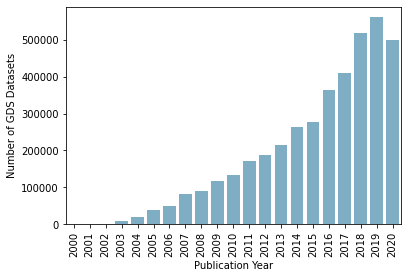

In [21]:
makePlotForQuery("{}[Publication Date]", "geo_experiments_year.png")

2000 0
2001 17
2002 133
2003 735
2004 1171
2005 1775
2006 2220
2007 2842
2008 3095
2009 3574
2010 4255
2011 5180
2012 5554
2013 5815
2014 5779
2015 5537
2016 4926
2017 4310
2018 3744
2019 3062
2020 1915


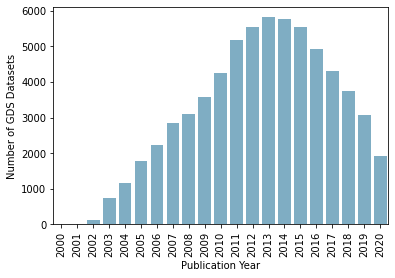

In [22]:
makePlotForQuery('{}[Publication Date] AND "expression profiling by array"[DataSet Type]', "geo_experiments_array_year.png")

2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 1
2007 1
2008 19
2009 35
2010 136
2011 309
2012 567
2013 1040
2014 1736
2015 2405
2016 4886
2017 5286
2018 6826
2019 8771
2020 7838


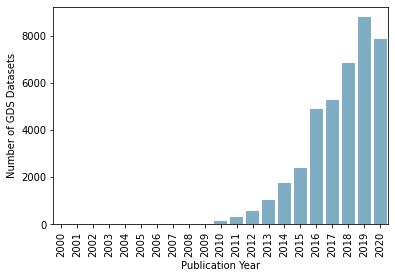

In [23]:
makePlotForQuery('{}[Publication Date] AND "expression profiling by high throughput sequencing"[DataSet Type]', "geo_experiments_hts_year.png")

2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 5
2016 9
2017 24
2018 140
2019 264
2020 316


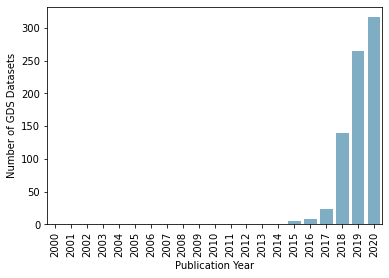

In [24]:
makePlotForQuery('{}[Publication Date] AND scRNA-seq AND "expression profiling by high throughput sequencing"[DataSet Type]', "geo_experiments_sc_year.png")